<a href="https://colab.research.google.com/github/pawnzo90z/assignments/blob/master/Bank_Project_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/sunny_int')

**Importing Lib & Pre-Processing**

In [ ]:
import pandas as pd
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline
from sklearn.model_selection import train_test_split

df=pd.read_csv('simpl_payments_bank_digicard_v1.0.csv')
#df.info()
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,user_id,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type
0,307c73a3-0c67-43b5-b0d1-62ad5f00b52a,Female,1987-01-03,Private,11th,7.0,Never-married,Sales,Unmarried,0.0,0.0,17.0,0,"45424 Norris Common Apt. 390\nNorth Mike, AR 8...",vasquezleah@yahoo.com,7.0,PVT,5,NaN,1.0,R
1,519481f1-604d-48b6-aa47-4123a982431a,Male,1970-01-07,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,0.0,0.0,48.0,0,"5022 Rebecca Haven Apt. 258\nThompsonfurt, CT ...",johnsontrevor@hotmail.com,13.0,NBF,5,NaN,1.0,R
2,f66fe2c6-53e3-46ce-8321-e530b4af1ace,Male,1973-01-06,Private,HS-grad,9.0,Divorced,Sales,Not-in-family,0.0,0.0,50.0,0,"8780 Brown Loaf Apt. 099\nNorth David, NJ 56510",morganemily@gmail.com,13.0,NBF,5,NaN,1.0,R
3,91360ed7-72d1-4f6e-b492-d71ef4480061,Female,2001-12-30,Private,11th,7.0,Never-married,Sales,Own-child,0.0,0.0,15.0,0,721 Jackson Extensions Suite 995\nNew Taraside...,agarcia@hotmail.com,13.0,NBF,5,NaN,1.0,R
4,0e1977f3-3bef-4283-8d0a-d60b0f6ff480,Male,1986-01-03,Private,Some-college,10.0,Married-civ-spouse,Handlers-cleaners,Husband,0.0,0.0,50.0,0,"935 Burch Divide\nLake Bobbyfurt, VT 14128",shermanmeredith@gmail.com,13.0,PVT,47,S,1.0,I


In [ ]:
# convert dtypes to int from object(string)
df['education_num'] = df['education_num'].astype(np.int64)
df['capital_gain'] = df['capital_gain'].astype(np.int64)
df['capital_loss'] = df['capital_loss'].astype(np.int64)


In [ ]:
# convert gender to numeric value and change dtype to int
print(df['gender'].value_counts())
df['gender'][df['gender']==' Male'] = 0
df['gender'][df['gender']==' Female'] = 1
df['gender'] = df['gender'].astype(np.int64)


 Male      30527
 Female    14695
Name: gender, dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#age
#convert DOB to pandas datetime
from dateutil.relativedelta import relativedelta
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
def f(end):
    r = relativedelta(pd.to_datetime('now'), end) 
    return r.years

df['age'] = df["date_of_birth"].apply(f)
print (df.head())
'''
# convert age to group 'Young','middle_aged','senior','old'
bins= [0,25,45,65,110]
labels = ['Young','middle_aged','senior','old']
df['agegroup_'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.head()
# one-hot encode age
df = pd.get_dummies(df, columns=["agegroup_"])
'''

                                user_id  gender  ... portfolio_type age
0  307c73a3-0c67-43b5-b0d1-62ad5f00b52a       1  ...              R  33
1  519481f1-604d-48b6-aa47-4123a982431a       0  ...              R  50
2  f66fe2c6-53e3-46ce-8321-e530b4af1ace       0  ...              R  47
3  91360ed7-72d1-4f6e-b492-d71ef4480061       1  ...              R  18
4  0e1977f3-3bef-4283-8d0a-d60b0f6ff480       0  ...              I  34

[5 rows x 22 columns]


'\n# convert age to group \'Young\',\'middle_aged\',\'senior\',\'old\'\nbins= [0,25,45,65,110]\nlabels = [\'Young\',\'middle_aged\',\'senior\',\'old\']\ndf[\'agegroup_\'] = pd.cut(df[\'age\'], bins=bins, labels=labels, right=False)\ndf.head()\n# one-hot encode age\ndf = pd.get_dummies(df, columns=["agegroup_"])\n'

In [ ]:
'''
#one hot encode workclass
#workclass
df.workclass.value_counts()
df=pd.get_dummies(df, columns=["workclass"])
'''

'\n#one hot encode workclass\n#workclass\ndf.workclass.value_counts()\ndf=pd.get_dummies(df, columns=["workclass"])\n'

In [ ]:
#marital_status
# convert into group of married,not_married,never_married
df.marital_status.value_counts()
def cat_married(end):
  if end == ' Married-civ-spouse' or end == ' Married-AF-spouse':
    return 'married'
  elif end ==' Divorced' or end ==' Separated' or end == ' Widowed' or end == ' Married-spouse-absent':
    return 'not_married'
  elif end == ' Never-married':
    return ' never_married'
  else:
    print('missed out this cat',end)
df["marital_status_less"] = df["marital_status"].apply(cat_married)
#df=pd.get_dummies(df, columns=["marital_status_less"])


In [ ]:
#occupation
df.occupation.value_counts()
#df=pd.get_dummies(df, columns=["occupation"])

 Craft-repair         6020
 Prof-specialty       6008
 Exec-managerial      5984
 Adm-clerical         5540
 Sales                5408
 Other-service        4808
 Machine-op-inspct    2970
 Transport-moving     2316
 Handlers-cleaners    2046
 Farming-fishing      1480
 Tech-support         1420
 Protective-serv       976
 Priv-house-serv       232
 Armed-Forces           14
Name: occupation, dtype: int64

In [ ]:
#hours_per_week
#convert working hours to group of 'part_time','full_time','over_time'
print(df['hours_per_week'].max())
bins= [0,25,40,100]
labels = ['part_time','full_time','over_time']
df['hours_'] = pd.cut(df['hours_per_week'], bins=bins, labels=labels, right=False)
df.head()
#df = pd.get_dummies(df, columns=["hours_"])

99.0


,user_id,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type,age,marital_status_less,hours_
0,307c73a3-0c67-43b5-b0d1-62ad5f00b52a,1,1987-01-03,Private,11th,7,Never-married,Sales,Unmarried,0,0,17.0,0,"45424 Norris Common Apt. 390\nNorth Mike, AR 8...",vasquezleah@yahoo.com,7.0,PVT,5,NaN,1.0,R,33,never_married,part_time
1,519481f1-604d-48b6-aa47-4123a982431a,0,1970-01-07,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,0,0,48.0,0,"5022 Rebecca Haven Apt. 258\nThompsonfurt, CT ...",johnsontrevor@hotmail.com,13.0,NBF,5,NaN,1.0,R,50,married,over_time
2,f66fe2c6-53e3-46ce-8321-e530b4af1ace,0,1973-01-06,Private,HS-grad,9,Divorced,Sales,Not-in-family,0,0,50.0,0,"8780 Brown Loaf Apt. 099\nNorth David, NJ 56510",morganemily@gmail.com,13.0,NBF,5,NaN,1.0,R,47,not_married,over_time
3,91360ed7-72d1-4f6e-b492-d71ef4480061,1,2001-12-30,Private,11th,7,Never-married,Sales,Own-child,0,0,15.0,0,721 Jackson Extensions Suite 995\nNew Taraside...,agarcia@hotmail.com,13.0,NBF,5,NaN,1.0,R,18,never_married,part_time
4,0e1977f3-3bef-4283-8d0a-d60b0f6ff480,0,1986-01-03,Private,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,0,0,50.0,0,"935 Burch Divide\nLake Bobbyfurt, VT 14128",shermanmeredith@gmail.com,13.0,PVT,47,S,1.0,I,34,married,over_time


In [ ]:
df.inquiry_purpose_code.value_counts()

13.0    20494
99.0     8862
7.0      5871
16.0     3536
2.0      2434
14.0     1108
6.0       479
1.0       353
10.0      183
8.0       172
5.0       126
3.0       124
11.0      110
4.0        40
17.0       21
9.0         7
18.0        7
12.0        4
Name: inquiry_purpose_code, dtype: int64

In [ ]:
def loan(loan_num):
  if loan_num == 3 or loan_num == 13 or loan_num == 14:
    return 'large'
  elif loan_num == 99:
    return 'other'
  else:
    return 'small'


df["loan_type_"] = df["inquiry_purpose_code"].apply(loan)
#df=pd.get_dummies(df, columns=["loan_type_"])
df.head()

,user_id,gender,date_of_birth,workclass,education_level,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,approved,address,email,inquiry_purpose_code,institute_type,account_type,asset_class_cd,asset_code,portfolio_type,age,marital_status_less,hours_,loan_type_
0,307c73a3-0c67-43b5-b0d1-62ad5f00b52a,1,1987-01-03,Private,11th,7,Never-married,Sales,Unmarried,0,0,17.0,0,"45424 Norris Common Apt. 390\nNorth Mike, AR 8...",vasquezleah@yahoo.com,7.0,PVT,5,NaN,1.0,R,33,never_married,part_time,small
1,519481f1-604d-48b6-aa47-4123a982431a,0,1970-01-07,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Craft-repair,Husband,0,0,48.0,0,"5022 Rebecca Haven Apt. 258\nThompsonfurt, CT ...",johnsontrevor@hotmail.com,13.0,NBF,5,NaN,1.0,R,50,married,over_time,large
2,f66fe2c6-53e3-46ce-8321-e530b4af1ace,0,1973-01-06,Private,HS-grad,9,Divorced,Sales,Not-in-family,0,0,50.0,0,"8780 Brown Loaf Apt. 099\nNorth David, NJ 56510",morganemily@gmail.com,13.0,NBF,5,NaN,1.0,R,47,not_married,over_time,large
3,91360ed7-72d1-4f6e-b492-d71ef4480061,1,2001-12-30,Private,11th,7,Never-married,Sales,Own-child,0,0,15.0,0,721 Jackson Extensions Suite 995\nNew Taraside...,agarcia@hotmail.com,13.0,NBF,5,NaN,1.0,R,18,never_married,part_time,large
4,0e1977f3-3bef-4283-8d0a-d60b0f6ff480,0,1986-01-03,Private,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,0,0,50.0,0,"935 Burch Divide\nLake Bobbyfurt, VT 14128",shermanmeredith@gmail.com,13.0,PVT,47,S,1.0,I,34,married,over_time,large


In [ ]:
df['asset_class_cd'].value_counts()

S     8609
?      319
B      230
L      144
D      110
M       78
01       1
-1       1
Name: asset_class_cd, dtype: int64

In [ ]:
df[df['asset_class_cd'] == '01']['asset_class_cd']
df['asset_class_cd'] = df['asset_class_cd'].fillna('Default')
df['asset_class_cd'].iloc[42306] = 'Default'
df['asset_class_cd'].iloc[14635] = 'Default'
#df = pd.get_dummies(df, columns=['asset_class_cd'])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
#asset_code no need
df.asset_code.value_counts()

1.0     43715
2.0      1164
4.0       199
19.0       62
Name: asset_code, dtype: int64

In [ ]:
df.portfolio_type.value_counts()
#df = pd.get_dummies(df, columns=['portfolio_type'])

R    26967
I    17088
M     1146
F       15
Name: portfolio_type, dtype: int64

In [ ]:
#gender(convert to numerical)
#remove date_of_birth(converted to age group) , 
#remove education_level(education_num is there with better data and bcs both of them are categorical remove edu_level)
#remove marital_status(converted to one_hot group)
# remove relationship(corelated with marital_status so remove)
#remove(hours_per_week,converted to group)
#remove address,email (no use)
#remove inquiry_purpose_code(converted to group)
#remove institute_type no use
# remove account_type lots of categories
#remove 'asset_class_cd' (converted to dummy)
#remove asset_code
# remove portfolio_type

In [ ]:
df = df.drop(['user_id', 'education_level', 'relationship', 'hours_per_week', 'address', 'email', 'inquiry_purpose_code','asset_code'], axis=1)

In [ ]:
df = df.drop(['date_of_birth'],axis = 1)



In [ ]:
df = df.drop(['marital_status'],axis = 1)



In [ ]:
df.head()

,gender,workclass,education_num,occupation,capital_gain,capital_loss,approved,institute_type,account_type,asset_class_cd,portfolio_type,age,marital_status_less,hours_,loan_type_
0,1,Private,7,Sales,0,0,0,PVT,5,Default,R,33,never_married,part_time,small
1,0,Self-emp-not-inc,10,Craft-repair,0,0,0,NBF,5,Default,R,50,married,over_time,large
2,0,Private,9,Sales,0,0,0,NBF,5,Default,R,47,not_married,over_time,large
3,1,Private,7,Sales,0,0,0,NBF,5,Default,R,18,never_married,part_time,large
4,0,Private,10,Handlers-cleaners,0,0,0,PVT,47,S,I,34,married,over_time,large


In [ ]:
df.dtypes

gender                    int64
workclass                object
education_num             int64
occupation               object
capital_gain              int64
capital_loss              int64
approved                  int64
institute_type           object
account_type              int64
asset_class_cd           object
portfolio_type           object
age                       int64
marital_status_less      object
hours_                 category
loan_type_               object
dtype: object

In [ ]:
df.dtypes

gender                    int64
workclass                object
education_num             int64
occupation               object
capital_gain              int64
capital_loss              int64
approved                  int64
institute_type           object
account_type              int64
asset_class_cd           object
portfolio_type           object
age                       int64
marital_status_less      object
hours_                 category
loan_type_               object
dtype: object

In [ ]:
for i in ['gender', 'workclass', 'education_num', 'occupation', 'capital_gain','capital_loss', 'approved', 'institute_type', 'account_type','asset_class_cd', 'portfolio_type', 'age', 'marital_status_less','hours_', 'loan_type_']:
  if str(df[i].dtype) == 'object':
    print(i)
    df[i] = df[i].astype('str')
    #df[i]=df[i].apply(pd.to_numeric, errors='coerce')

workclass
occupation
institute_type
asset_class_cd
portfolio_type
marital_status_less
loan_type_


In [ ]:
import numpy as np
import pandas as pd

import tensorflow as tf

from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
df.head()

,gender,workclass,education_num,occupation,capital_gain,capital_loss,approved,institute_type,account_type,asset_class_cd,portfolio_type,age,marital_status_less,hours_,loan_type_
0,1,Private,7,Sales,0,0,0,PVT,5,Default,R,33,never_married,part_time,small
1,0,Self-emp-not-inc,10,Craft-repair,0,0,0,NBF,5,Default,R,50,married,over_time,large
2,0,Private,9,Sales,0,0,0,NBF,5,Default,R,47,not_married,over_time,large
3,1,Private,7,Sales,0,0,0,NBF,5,Default,R,18,never_married,part_time,large
4,0,Private,10,Handlers-cleaners,0,0,0,PVT,47,S,I,34,married,over_time,large


In [ ]:
df.account_type.value_counts().index

Int64Index([  5, 189, 123,  47, 173, 191,  58, 130, 999, 121, 178, 184, 177,
            176, 224, 227, 195, 172, 213, 179, 221, 185, 226, 181, 187, 228,
            240, 167, 223, 198, 170, 197, 175, 168, 220, 222, 214],
           dtype='int64')

In [ ]:
tf.keras.backend.set_floatx('float64')

In [ ]:
feature_columns = []

# numeric cols
for header in ['gender', 'education_num', 'capital_gain', 'capital_loss']:
  feature_columns.append(feature_column.numeric_column(header))

# bucketized cols
age = feature_column.numeric_column("age")
age_buckets = feature_column.bucketized_column(age, boundaries=[25,45,65,110])
feature_columns.append(age_buckets)

# indicator cols
workclass = feature_column.categorical_column_with_vocabulary_list(
      'workclass', [' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',' Self-emp-inc', ' Federal-gov', ' Without-pay'])
workclass_one_hot = feature_column.indicator_column(workclass)
feature_columns.append(workclass_one_hot)


occupation = feature_column.categorical_column_with_vocabulary_list(
      'occupation', [' Craft-repair', ' Prof-specialty', ' Exec-managerial', ' Adm-clerical',
       ' Sales', ' Other-service', ' Machine-op-inspct', ' Transport-moving',
       ' Handlers-cleaners', ' Farming-fishing', ' Tech-support',
       ' Protective-serv', ' Priv-house-serv', ' Armed-Forces'])
occupation_one_hot = feature_column.indicator_column(occupation)
feature_columns.append(occupation_one_hot)

institute_type = feature_column.categorical_column_with_vocabulary_list(
      'institute_type', ['PVT', 'NBF', 'PUB', 'HFC', 'BRO', 'FOR', 'INS', 'COB', 'SRC', 'TEL'])
institute_type_one_hot = feature_column.indicator_column(institute_type)
feature_columns.append(institute_type_one_hot)

asset_class_cd = feature_column.categorical_column_with_vocabulary_list(
      'asset_class_cd', ['Default', 'S', '?', 'B', 'L', 'D', 'M'])
asset_class_cd_one_hot = feature_column.indicator_column(asset_class_cd)
feature_columns.append(asset_class_cd_one_hot)

portfolio_type = feature_column.categorical_column_with_vocabulary_list(
      'portfolio_type', ['R', 'I', 'M', 'F'])
portfolio_type_one_hot = feature_column.indicator_column(portfolio_type)
feature_columns.append(portfolio_type_one_hot)


marital_status_less = feature_column.categorical_column_with_vocabulary_list(
      'marital_status_less', ['married', ' never_married', 'not_married'])
marital_status_less_one_hot = feature_column.indicator_column(marital_status_less)
feature_columns.append(marital_status_less_one_hot)


hours_ = feature_column.categorical_column_with_vocabulary_list(
      'hours_', ['over_time', 'full_time', 'part_time'])
hours__one_hot = feature_column.indicator_column(hours_)
feature_columns.append(hours__one_hot)


loan_type_ = feature_column.categorical_column_with_vocabulary_list(
      'loan_type_', ['large', 'small', 'other'])
loan_type__one_hot = feature_column.indicator_column(loan_type_)
feature_columns.append(loan_type__one_hot)

# embedding cols
account_type = feature_column.categorical_column_with_vocabulary_list(
      'account_type', [  5, 189, 123,  47, 173, 191,  58, 130, 999, 121, 178, 184, 177,
            176, 224, 227, 195, 172, 213, 179, 221, 185, 226, 181, 187, 228,
            240, 167, 223, 198, 170, 197, 175, 168, 220, 222, 214])
account_type_embedding = feature_column.embedding_column(account_type, dimension=12)
feature_columns.append(account_type_embedding)

# crossed cols
#crossed_feature = feature_column.crossed_column([age_buckets, thal], hash_bucket_size=1000)
#crossed_feature = feature_column.indicator_column(crossed_feature)
#feature_columns.append(crossed_feature)

In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
train, test = train_test_split(df, test_size=0.2)
train, val = train_test_split(train, test_size=0.25)
print(len(train), 'train examples')
print(len(val), 'validation examples')
print(len(test), 'test examples')

27132 train examples
9045 validation examples
9045 test examples


In [ ]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('approved')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
batch_size = 64
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=True, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=True, batch_size=batch_size)

In [ ]:
model = tf.keras.Sequential([
  feature_layer,
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_ds,
          validation_data=val_ds,
          epochs=10)

Epoch 1/10

If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

424/424 [==============================] - 4s 10ms/step - loss: 4.8812 - accuracy: 0.7987 - val_loss: 5.3676 - val_accuracy: 0.8116
Epoch 2/10
424/424 [==============================] - 4s 9ms/step - loss: 1.2794 - accuracy: 0.8137 - val_loss: 0.3918 - val_accuracy: 0.8320
Epoch 3/10
424/424 [==============================] - 4s 9ms/step - loss: 0.6752 - accuracy: 0.8194 - val_loss: 0.9053 - val_accuracy: 0.8132
Epoch 4/10
424/424 [==============================] - 4s 9ms/step - loss: 0.4114 

In [ ]:
loss, accuracy = model.evaluate(test_ds)
print("Accuracy", accuracy)

142/142 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8332
Accuracy 0.833167495854063


In [ ]:
for i in test_ds.take(2):
  print(i)

({'gender': <tf.Tensor: shape=(64,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])>, 'workclass': <tf.Tensor: shape=(64,), dtype=string, numpy=
array([b' Self-emp-not-inc', b' Self-emp-not-inc', b' Private',
       b' Self-emp-inc', b' Self-emp-not-inc', b' Private', b' Private',
       b' Private', b' Private', b' Private', b' Private', b' Private',
       b' State-gov', b' Private', b' Self-emp-not-inc', b' State-gov',
       b' Local-gov', b' Private', b' Private', b' Self-emp-inc',
       b' Private', b' Private', b' Private', b' State-gov', b' Private',
       b' Private', b' Private', b' Private', b' Private', b' Private',
       b' Private', b' Private', b' Private', b' Private',
       b' Self-emp-not-inc', b' Self-emp-not-inc', b' Local-gov',
       b' Private', b' Private', b' Private', b' P

In [ ]:
model.predict(test_ds)

array([[-7.49428484],
       [-6.01008518],
       [ 2.87356679],
       ...,
       [ 1.25654307],
       [-1.50913073],
       [-4.37151426]])

In [ ]:
df.institute_type.value_counts()

PVT    26669
NBF    15927
PUB     1226
HFC      906
BRO      303
FOR      107
INS       41
COB       35
TEL        4
SRC        4
Name: institute_type, dtype: int64

In [ ]:
df.asset_class_cd.value_counts() #null too many may skip

S     8609
?      319
B      230
L      144
D      110
M       78
01       1
-1       1
Name: asset_class_cd, dtype: int64

In [ ]:
df.asset_code.value_counts() #imbalance data

1.0     43715
2.0      1164
4.0       199
19.0       62
Name: asset_code, dtype: int64

In [ ]:
df.portfolio_type.value_counts()

R    26967
I    17088
M     1146
F       15
Name: portfolio_type, dtype: int64

In [ ]:
df.describe()

,education_num,capital_gain,capital_loss,hours_per_week,approved,inquiry_purpose_code,account_type,asset_code
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,43931.000000,45222.000000,45140.000000
mean,10.118460,1101.430344,88.595418,40.938017,0.247844,28.936560,79.807019,1.063735
std,2.552881,7506.430084,404.956092,12.007508,0.431766,35.393095,143.951963,0.711637
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,5.000000,1.000000
25%,9.000000,0.000000,0.000000,40.000000,0.000000,13.000000,5.000000,1.000000
50%,10.000000,0.000000,0.000000,40.000000,0.000000,13.000000,5.000000,1.000000
75%,13.000000,0.000000,0.000000,45.000000,0.000000,16.000000,173.000000,1.000000
max,16.000000,99999.000000,4356.000000,99.000000,1.000000,99.000000,999.000000,19.000000


Pearson Correlation: (0.3327998791762555, 0.0)
                                 OLS Regression Results                                
Dep. Variable:          education_num   R-squared (uncentered):                   0.306
Model:                            OLS   Adj. R-squared (uncentered):              0.306
Method:                 Least Squares   F-statistic:                          1.995e+04
Date:                Wed, 27 May 2020   Prob (F-statistic):                        0.00
Time:                        16:04:41   Log-Likelihood:                     -1.6196e+05
No. Observations:               45222   AIC:                                  3.239e+05
Df Residuals:                   45221   BIC:                                  3.239e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0

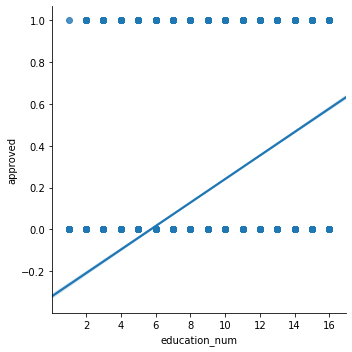

In [ ]:
from scipy.stats import pearsonr
import statsmodels.api as sm
print("Pearson Correlation:", pearsonr(df.approved, df.education_num))
print(sm.OLS(df.education_num, df.approved).fit().summary())
sns.lmplot(y = 'approved', x='education_num', data=df)

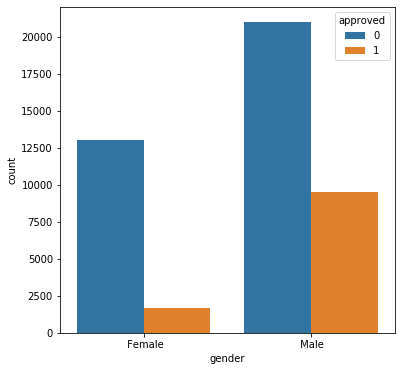

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x="gender", hue="approved", data=df)
plt.show() 

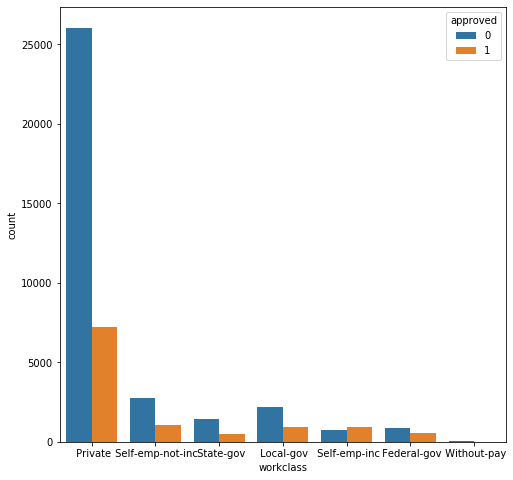

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.countplot(x="workclass", hue="approved", data=df)
plt.show() 

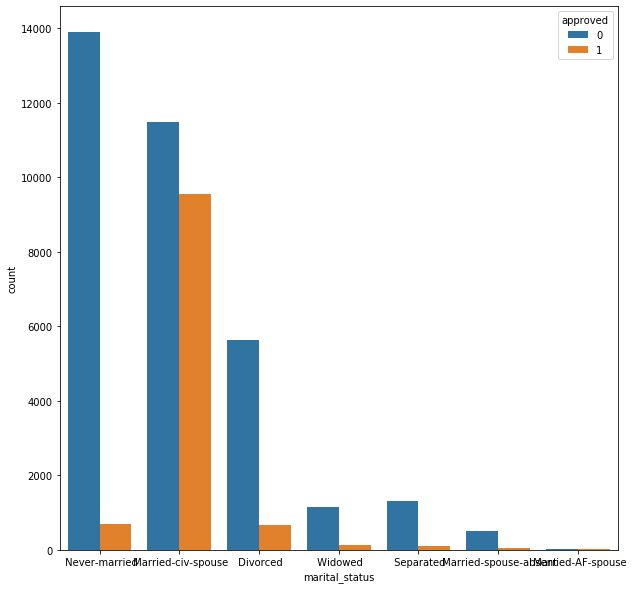

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(x="marital_status", hue="approved", data=df)
plt.show() 

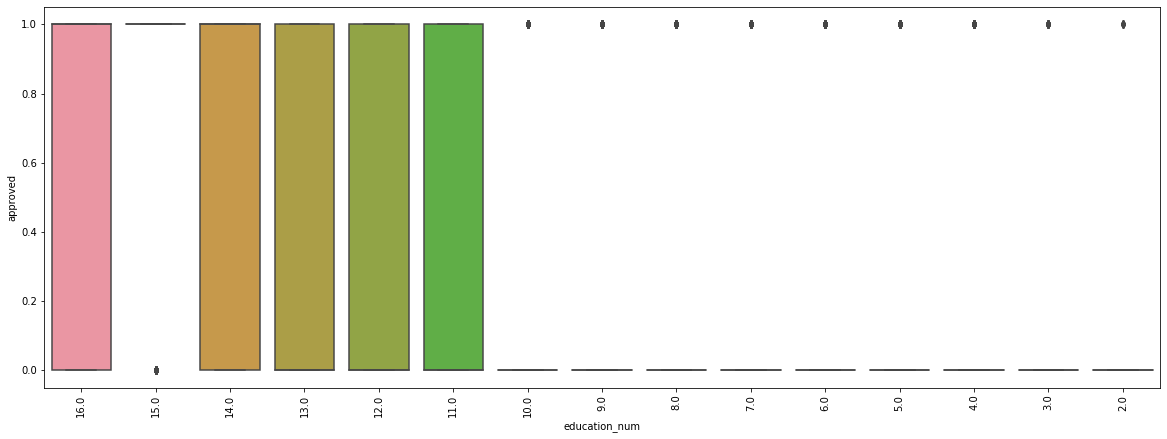

In [ ]:
education_num=df.groupby('education_num').filter(lambda x: len(x) >100)
df2 = pd.DataFrame({col:vals['approved'] for col,vals in education_num.groupby('education_num')})
meds = df2.median()
meds.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='education_num',y='approved', data=education_num, order=meds.index, ax = ax)
plt.xticks(rotation = 90)

plt.show()

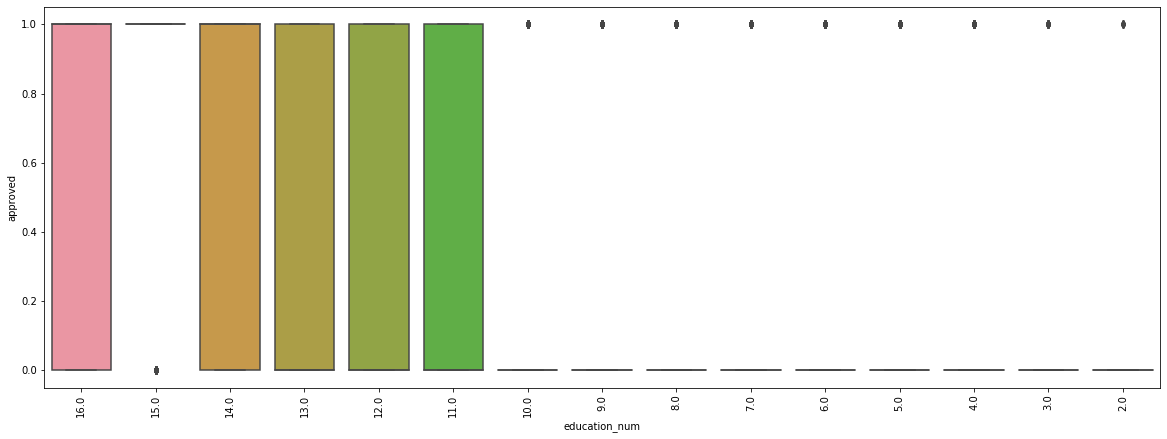

In [ ]:
education_num=df.groupby('education_num').filter(lambda x: len(x) >100)
df2 = pd.DataFrame({col:vals['approved'] for col,vals in education_num.groupby('education_num')})
meds = df2.median()
meds.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize = (20,7))
chart = sns.boxplot(x='education_num',y='approved', data=education_num, order=meds.index, ax = ax)
plt.xticks(rotation = 90)

plt.show() 

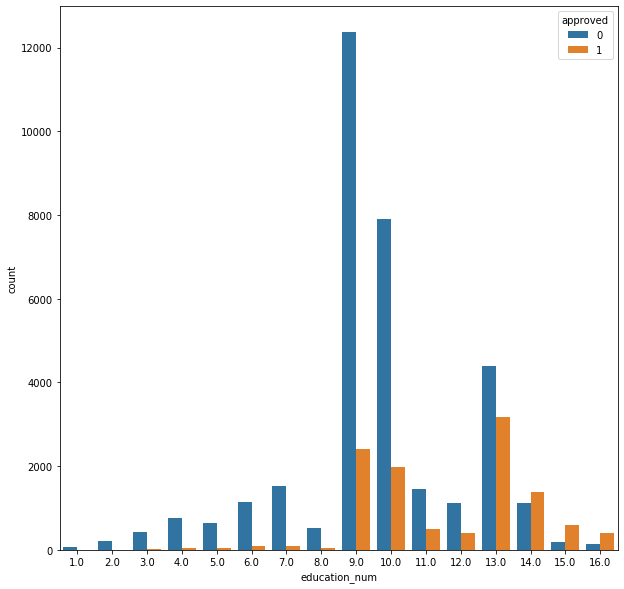

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.countplot(x="education_num", hue="approved", data=df)
plt.show() 

In [ ]:
df.shape
df.columns

Index(['user_id', 'gender', 'date_of_birth', 'workclass', 'education_level',
       'education_num', 'marital_status', 'occupation', 'relationship',
       'capital_gain', 'capital_loss', 'hours_per_week', 'approved', 'address',
       'email', 'inquiry_purpose_code', 'institute_type', 'account_type',
       'asset_class_cd', 'asset_code', 'portfolio_type'],
      dtype='object')

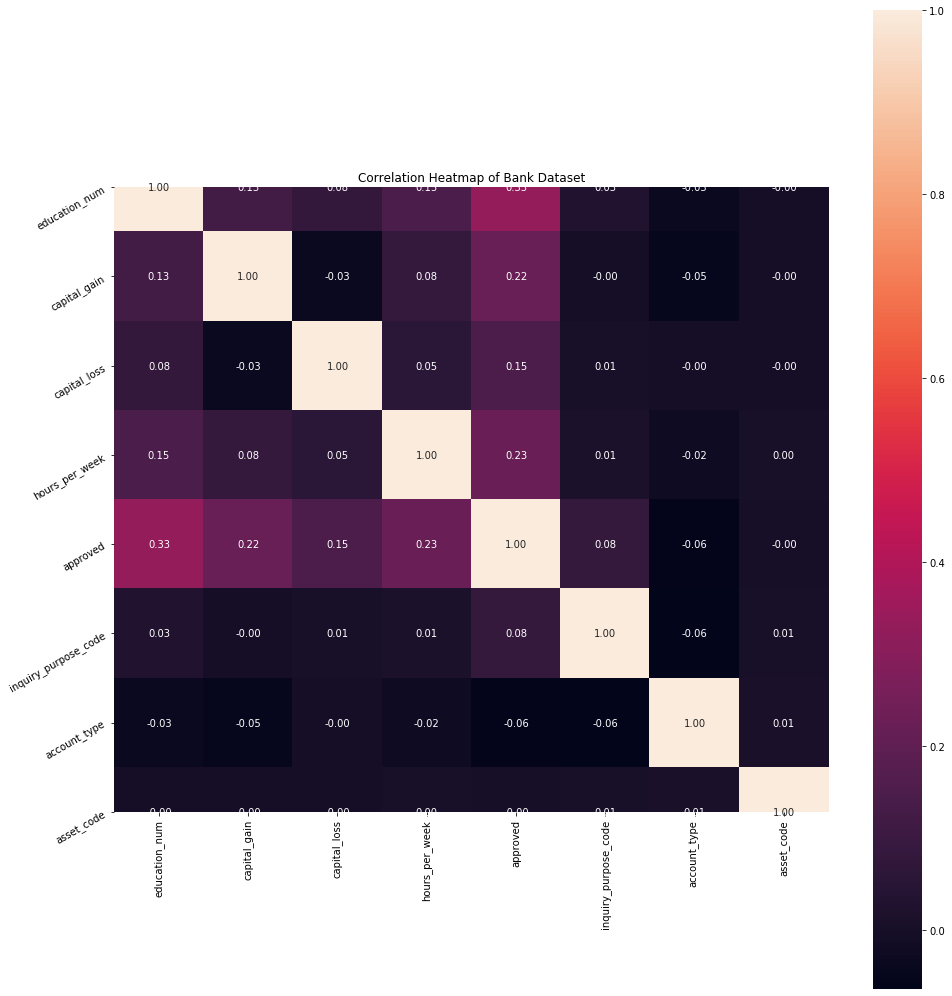

In [ ]:
correlation = df.corr()
plt.figure(figsize=(16,18))
plt.title('Correlation Heatmap of Bank Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [ ]:
df['workclass'].value_counts()

 Private             33307
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

In [ ]:
df['portfolio_type'].value_counts()

R    26967
I    17088
M     1146
F       15
Name: portfolio_type, dtype: int64

In [ ]:
df['inquiry_purpose_code'].value_counts()

13.0    20494
99.0     8862
7.0      5871
16.0     3536
2.0      2434
14.0     1108
6.0       479
1.0       353
10.0      183
8.0       172
5.0       126
3.0       124
11.0      110
4.0        40
17.0       21
9.0         7
18.0        7
12.0        4
Name: inquiry_purpose_code, dtype: int64

In [ ]:
df['marital_status'].value_counts()

 Married-civ-spouse       21055
 Never-married            14598
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: marital_status, dtype: int64

In [ ]:
df.isnull().sum()

user_id                     0
gender                      0
date_of_birth               0
workclass                   0
education_level             0
education_num               0
marital_status              0
occupation                  0
relationship                0
capital_gain                0
capital_loss                0
hours_per_week              0
approved                    0
address                     0
email                       0
inquiry_purpose_code     1291
institute_type              0
account_type                0
asset_class_cd          35730
asset_code                 82
portfolio_type              6
dtype: int64

In [ ]:
df['asset_class_cd'].value_counts()
df['education_num'].value_counts()

9.0     14783
10.0     9899
13.0     7570
14.0     2514
11.0     1959
7.0      1619
12.0     1507
6.0      1223
4.0       823
15.0      785
5.0       676
8.0       577
16.0      544
3.0       449
2.0       222
1.0        72
Name: education_num, dtype: int64

In [ ]:
debt-to-income
35% payment history, 30% amount owed, 15% length of history, 10% new credit, 10% types of credit used.
https://www.investopedia.com/terms/u/underwriting.asp
http://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/024.pdf
https://rpubs.com/Net/IncomeLevelClassification
https://rstudio-pubs-static.s3.amazonaws.com/296518_b3035d35b9634ed2ba19fc7bf63b50ca.html
https://www.rdocumentation.org/packages/arules/versions/1.6-6/topics/Adult